![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 2. Preparación de datos

Una vez entendido el contexto de la problemática y realizado el análisis exploratorio de datos de acuerdo con la descripción del dataset y la información entregada al equipo en la fase anterior, se comparte un paso a paso que deberá ser diligenciado por el equipo de ciencia de datos asignado para esta tarea con el fin de guiar el proceso de EDA y preparación de datos, lo cual es crucial antes de desarollar el modelamiento. 

El estudio tiene como objetivo la clasificación de un paciente como hospitalizado o no hospitalizado.




Carguen la base de datos y revisen el tipo de cada columna del dataset. Si es necesario realicen conversiones de tipos de datos. 

In [1]:
# importamos librerias y cargamos el dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("BBDD_Hospitalización.xlsx")

C:\Users\Javo\AppData\Roaming\Python\Python311\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [2]:
df = df.drop([568, 569])


In [3]:
df.head(21)

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0
5,55.0,SI,SI,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,2,NO,NO,NO,NO,NO,SI,3.0,0.0
6,53.0,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,2,SI,SI,UROCULTIVO,E.COLI,"RESISTENTE A AMPI, CIPRO Y GENTA",SI,3.0,0.0
7,67.0,NO,NO,6.20,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,2,SI,SI,HEMOCULTIVO Y UROCULTIVO,E.COLI,"RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROX...",SI,2.0,0.0
8,69.0,NO,NO,6.00,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,2,SI,NO,NO,NO,NO,SI,4.0,0.0
9,44.0,NO,NO,NaN,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,2,SI,NO,NO,NO,NO,SI,3.0,0.0


In [4]:
df.loc[df["EDAD"] > 140, 'EDAD'] = None
df['EDAD'] = df['EDAD'].fillna(np.floor(df['EDAD'].mean())) 


In [5]:
df.columns

Index(['EDAD', 'DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'PSA',
       'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO',
       'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS', 'NUMERO DE MUESTRAS TOMADAS',
       'CUP', 'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA',
       'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA',
       'FIEBRE', 'ITU', 'TIPO DE CULTIVO', 'AGENTE AISLADO',
       'PATRON DE RESISTENCIA', 'HOSPITALIZACION', 'DIAS HOSPITALIZACION MQ',
       'DIAS HOSPITALIZACIÓN UPC'],
      dtype='object')

Eliminen variables si es que consideran irrelevantes, sustentando adecuadamente por qué.

In [6]:
#Considerando que se nos pide predecir la probabilidad de hospitalización luego de una biopsia prostatica,
#se partirá de la hipotesis de que la hospitalización se debe a una reacción alérgica al antibiotico usado,
#por ello se eliminaran las siguientes columnas:
# EPOC/Vol prostático - porque son relativas al cancer de próstata
#Tipo de cultivo/Biopsias previas/ Hospitalización ultimo mes/ Diabetes/PSA - por irrelevancia en la hipotesis
#Hospitalizacion mq/upc - los detalles de hospitalizacion son irrelevantes
#CUP - No se uso cateter
# Dias post biopsia - Se puede utilizar para otros analisis pero no aporta mucho a la probabilidad de hospitalizacion

df2 = df.copy()

df2 = df2.drop(columns=['DIABETES', 'HOSPITALIZACIÓN ULTIMO MES','PSA', 'CUP', 'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA',
       'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO','NUMERO DE MUESTRAS TOMADAS','ENF. CRONICA PULMONAR OBSTRUCTIVA',
       'BIOPSIA', 'DIAS HOSPITALIZACION MQ','DIAS HOSPITALIZACIÓN UPC'])

Revisen la distribución estadística para el caso de las variables numéricas. ¿Qué gráficos permiten realizar un estudio exploratorio de la distribución? ¿Hay datos atípicos?

In [7]:
df2.describe()

,EDAD,PSA
count,568.000000,564.000000
mean,63.586268,13.271401
std,7.850878,15.668966
min,39.000000,0.600000
25%,59.000000,5.600000
50%,64.000000,8.000000
75%,69.000000,15.000000
max,84.000000,100.000000


Si encontraron datos atípicos, ¿Imputarán o eliminarán los valores? Sustentar.

In [8]:
#Dentro de edad se encontraron 2 valores atípicos y
#se decidió reemplazarlos por la media ya que esos valores seguro se debían a errores de tipeo (151, 143)

Para las variables categóricas, realizar una visualización adecuada para observar las frecuencias de cada categoría. ¿Observa alguna anomalía, problema de formato en alguna variable?

In [9]:
#En patrón de resistencia se identifican varios valores pero escritos de diferente manera en las filas,
#Se pueden realizar dos cosas: unificar la redaccion de cada patron, o simplificarla a determinar si presenta
#un patron de resistencia o no. Por las caracteristicas de los datos se va a optar por la segunda
df2

,EDAD,PSA,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION
0,53.0,4.00,FLUOROQUINOLONA_AMINOGLICOSIDO,SI,NO,NO,NO,NO,SI
1,56.0,7.70,FLUOROQUINOLONA_AMINOGLICOSIDO,SI,NO,NO,NO,NO,SI
2,57.0,29.00,FLUOROQUINOLONA_AMINOGLICOSIDO,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI
3,56.0,7.00,FLUOROQUINOLONA_AMINOGLICOSIDO,SI,NO,NO,NO,NO,SI
4,55.0,29.00,FLUOROQUINOLONA_AMINOGLICOSIDO,SI,NO,HEMOCULTIVO,E.COLI,NO,SI
...,...,...,...,...,...,...,...,...,...
563,67.0,6.00,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NO,NO,NO,NO
564,64.0,4.80,OTROS,NO,NO,NO,NO,NO,NO
565,69.0,4.43,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NO,NO,NO,NO
566,67.0,8.00,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NO,NaN,NO,NO


Revisen la cantidad de nulos que tiene cada columna. ¿Es necesario eliminar alguna columna? ¿Se imputarán valores? En caso de imputar, explicar en cada caso, por medio de qué estrategia lo harán. 

In [10]:
df2.info()
# Se identifican 3 nulos en hospitalización, los cuales se borrarán porque no pueden aportar al modelo de predicción
# ya que va a ser la "y" 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   EDAD                                     568 non-null    float64
 1   PSA                                      564 non-null    float64
 2   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS  568 non-null    object 
 3   FIEBRE                                   568 non-null    object 
 4   ITU                                      568 non-null    object 
 5   TIPO DE CULTIVO                          568 non-null    object 
 6   AGENTE AISLADO                           551 non-null    object 
 7   PATRON DE RESISTENCIA                    568 non-null    object 
 8   HOSPITALIZACION                          565 non-null    object 
dtypes: float64(2), object(7)
memory usage: 40.1+ KB


In [11]:
df2.dropna(subset="HOSPITALIZACION", inplace=True)

Para el caso de las variables numéricas, ¿Es necesario normalizar?

In [12]:
#Ya están normalizadas

Realice las transformaciones que considere pertinentes con el fin de preparar los datos para un modelo de clasificación de un paciente con desenlace en Hospitalización. 

In [13]:
#Habia columnas con un nombre de antibiotico escrito con acento y otros no, entonces los unificamos y le ponemos un nombre mas corto a la columna
df2.loc[df2["ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS"] == "FLUOROQUINOLONA_AMINOGLICÓSIDO", 'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'] = "FLUOROQUINOLONA_AMINOGLICOSIDO"
df2 = df2.rename(columns={"ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS":"ANTIBIOTICO UTILIZADO"})

#Se simplifica el patrón de resistencia, ya que ningun caso que no resultó hospitalizado presentó alguno. Los más comunes fueron -> Ampi, cipro, genta
df2.loc[df2["PATRON DE RESISTENCIA"] != "NO", "PATRON DE RESISTENCIA"] = "SI"

In [14]:
df2["ANTIBIOTICO UTILIZADO"] = df2["ANTIBIOTICO UTILIZADO"].str.replace("_", " ")
df2.head(24)

,EDAD,PSA,ANTIBIOTICO UTILIZADO,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION
0,53.0,4.00,FLUOROQUINOLONA AMINOGLICOSIDO,SI,NO,NO,NO,NO,SI
1,56.0,7.70,FLUOROQUINOLONA AMINOGLICOSIDO,SI,NO,NO,NO,NO,SI
2,57.0,29.00,FLUOROQUINOLONA AMINOGLICOSIDO,SI,NO,HEMOCULTIVO,E.COLI,SI,SI
3,56.0,7.00,FLUOROQUINOLONA AMINOGLICOSIDO,SI,NO,NO,NO,NO,SI
4,55.0,29.00,FLUOROQUINOLONA AMINOGLICOSIDO,SI,NO,HEMOCULTIVO,E.COLI,NO,SI
5,55.0,4.00,FLUOROQUINOLONA AMINOGLICOSIDO,NO,NO,NO,NO,NO,SI
6,53.0,7.00,FLUOROQUINOLONA AMINOGLICOSIDO,SI,SI,UROCULTIVO,E.COLI,SI,SI
7,67.0,6.20,FLUOROQUINOLONA AMINOGLICOSIDO,SI,SI,HEMOCULTIVO Y UROCULTIVO,E.COLI,SI,SI
8,69.0,6.00,FLUOROQUINOLONA AMINOGLICOSIDO,SI,NO,NO,NO,NO,SI
9,44.0,NaN,FLUOROQUINOLONA AMINOGLICOSIDO,SI,NO,NO,NO,NO,SI


Realice una matriz de correlación con el fin de determinar si hay variables redundantes. En caso de encontrar altas correlaciones, ¿Tomará alguna acción?

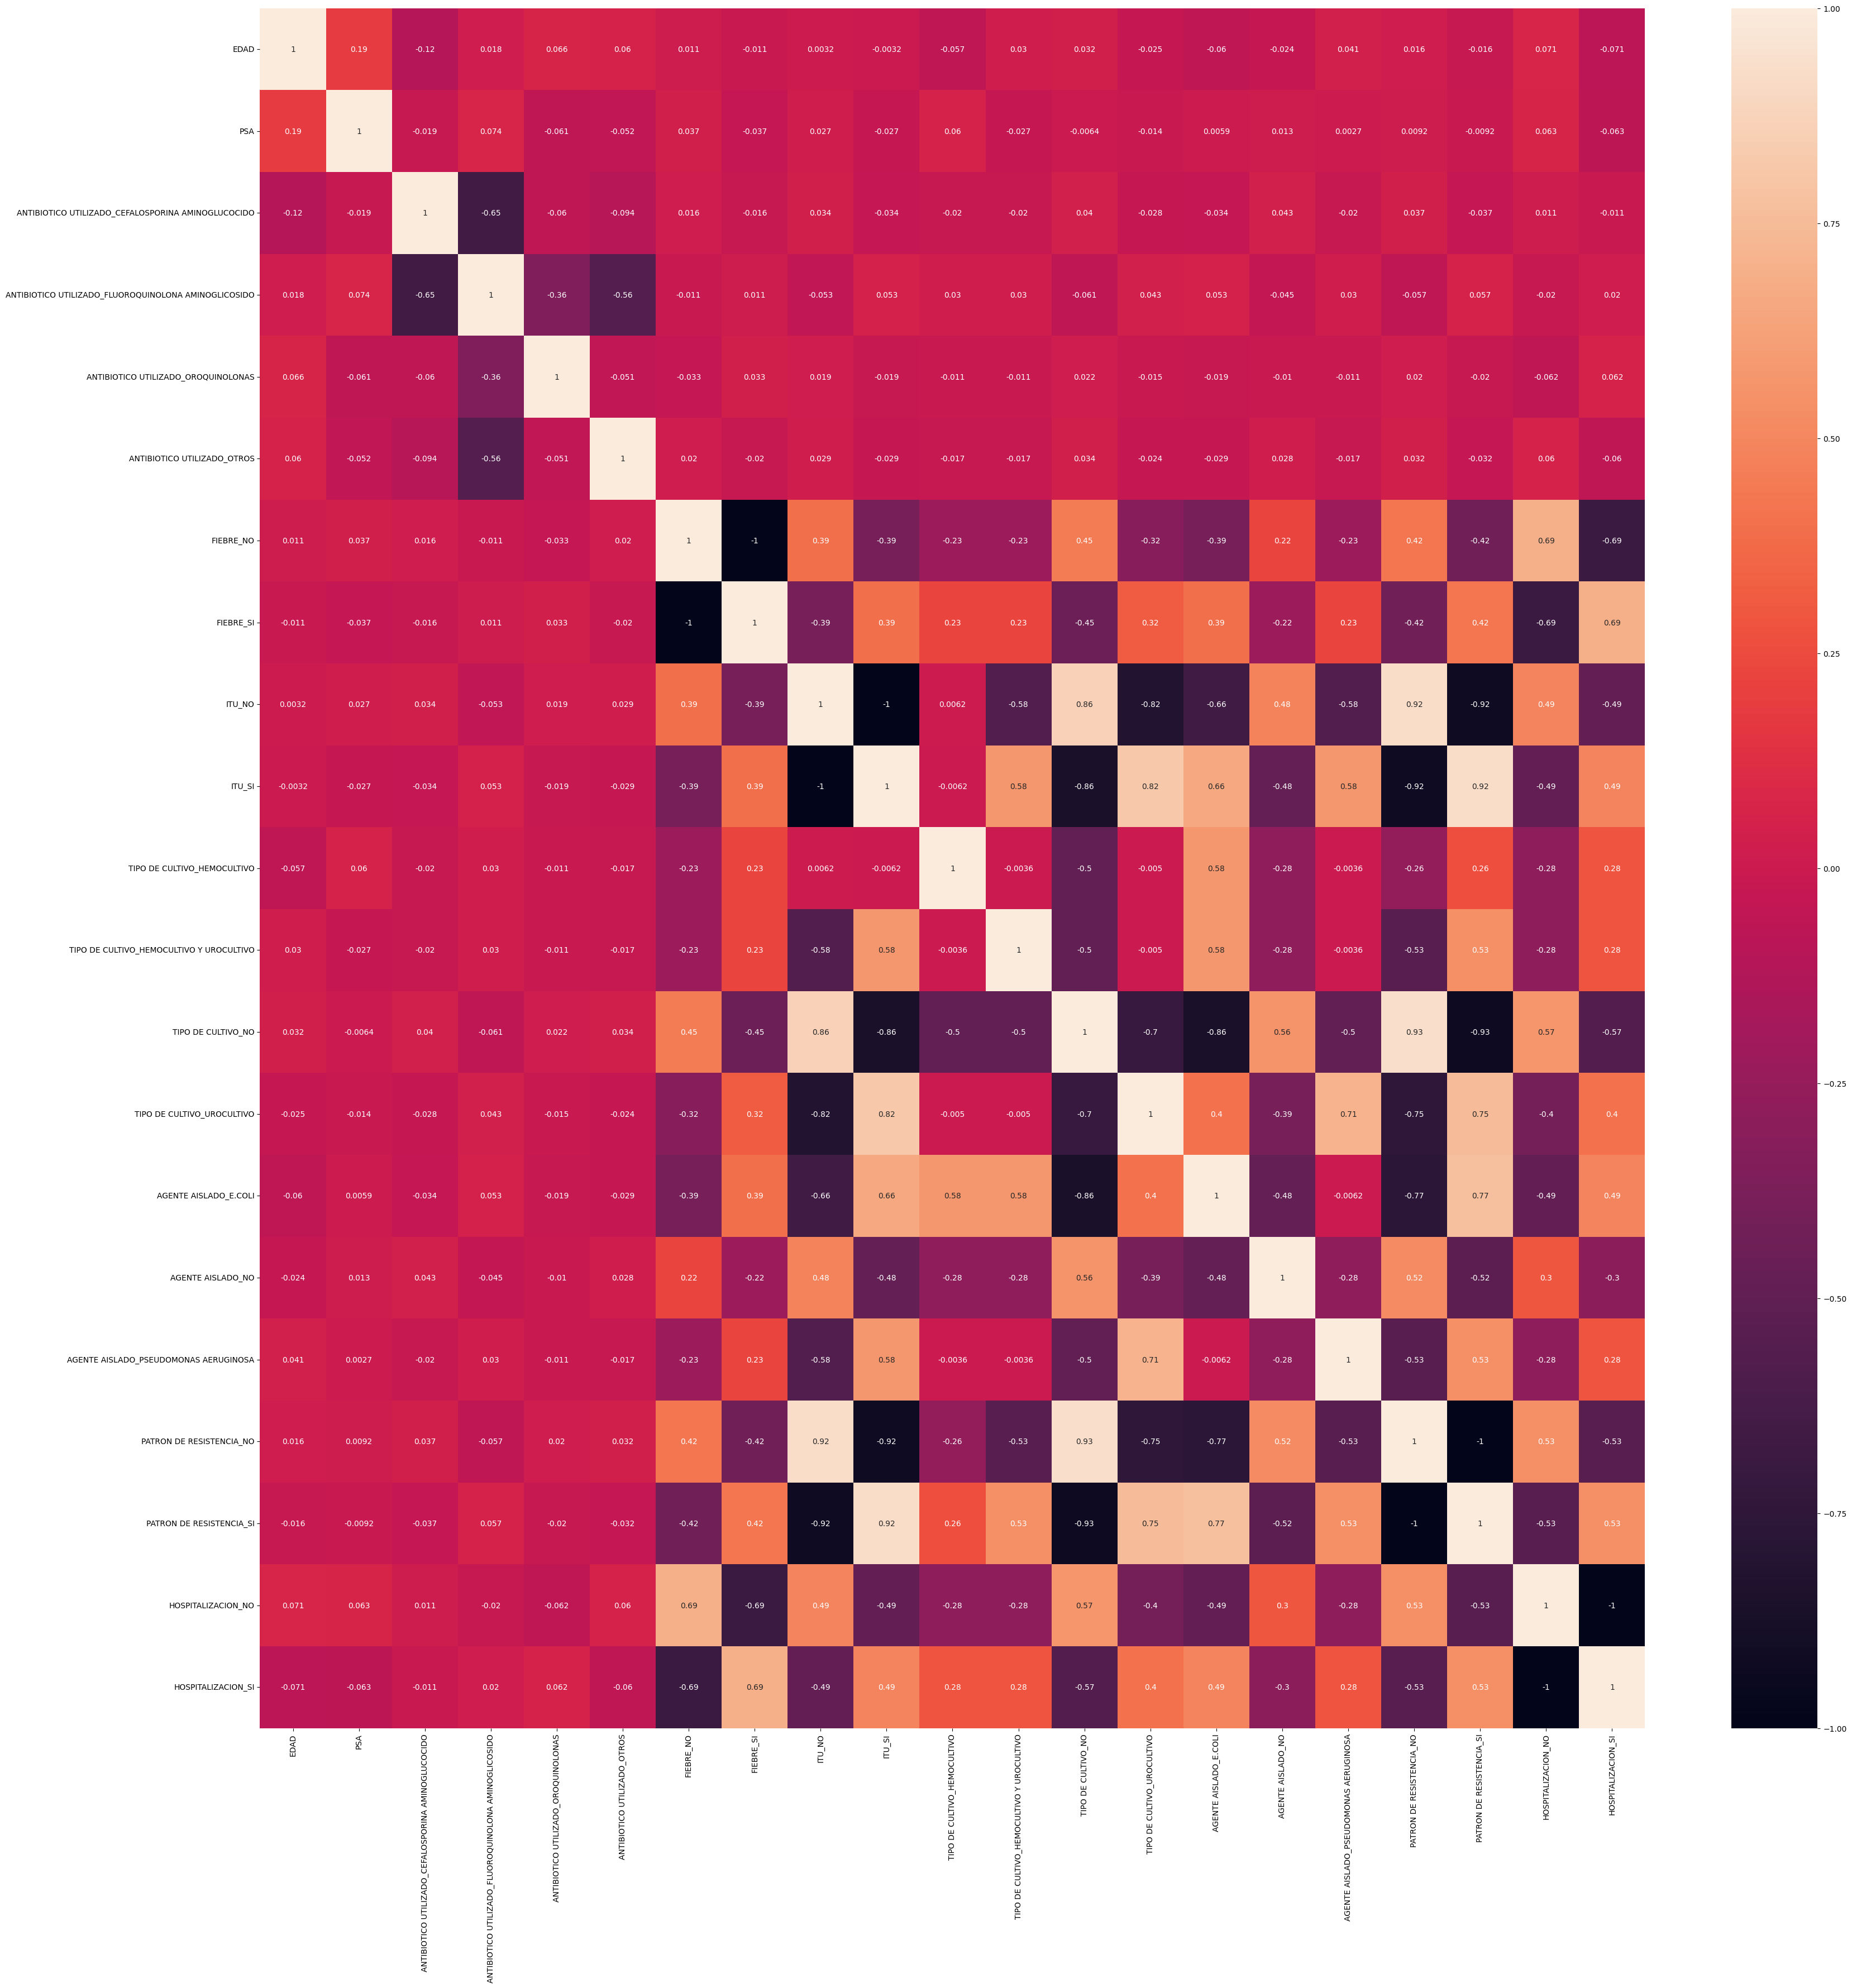

In [15]:
coef = pd.get_dummies(df2)
coef = coef.corr(method='pearson')
plt.figure(figsize=(40,40))
sns.heatmap(coef, annot=True)
plt.show()
#Podemos ver que aparentemente los antibioticos utilizados no tienen una buena correlación y se ven rendudantes.
#Pero se dejaran porque varias correlaciones pueden estar sesgadas por el desbalanceo de los datos, el cual es muy grande

In [16]:
df2.columns

Index(['EDAD', 'PSA', 'ANTIBIOTICO UTILIZADO', 'FIEBRE', 'ITU',
       'TIPO DE CULTIVO', 'AGENTE AISLADO', 'PATRON DE RESISTENCIA',
       'HOSPITALIZACION'],
      dtype='object')

Exporte la base de datos preparada en un archivo .csv para el modelamiento. 

In [17]:
df2.to_csv('data.csv', index=False)